In [38]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv('weather.csv', sep=';')
df

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,Albury,20.4,37.6,0.0,54,0,7,46,17,1013.4,1009.2,3,26.1,36.7,No,No
1,1,Albury,20.9,33.6,0.4,50,9,17,54,30,1011.1,1008.4,8,24.8,31.7,No,Yes
2,1,Albury,18.4,23.1,2.2,48,11,39,62,67,1014.0,1014.8,8,21.8,19.5,Yes,Yes
3,1,Albury,17.3,23.7,15.6,39,9,17,74,65,1017.9,1016.5,8,19.2,21.6,Yes,Yes
4,1,Albury,15.5,22.9,6.8,31,6,9,92,63,1016.3,1013.9,8,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,12,Uluru,22.1,35.8,63.8,43,17,31,77,41,997.8,995.2,2,26.0,33.5,Yes,No
14464,12,Uluru,22.6,36.8,0.0,50,30,15,63,39,1000.0,998.8,-1,29.7,34.0,No,No
14465,12,Uluru,23.2,38.0,0.0,33,17,17,25,14,1004.4,1001.0,-1,28.7,36.4,No,No
14466,12,Uluru,19.7,37.0,0.0,37,22,6,30,23,1004.6,1000.9,-1,28.2,35.1,No,No


# 1
Caricare il dataset introducendo un opportuno nome per le colonne e denominarlo con una
variabile chiamata “dataset”

2. Quante sono le istanze contenute nel dataset? _______ Il dataset è completo (cioè non
esistono valori nulli)? _______ Il dataset è bilanciato per quanto riguarda la classe da predire?
_______ Il numero di rilevazioni per città è bilanciato? _______ (punti 2)

14468
Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
Axes(0.125,0.11;0.775x0.77)


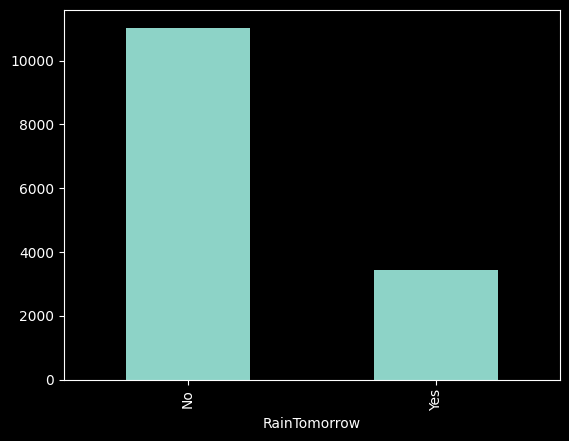

In [40]:
print(df.shape[0])
print(df.isnull().sum())
print(df['RainTomorrow'].value_counts().plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


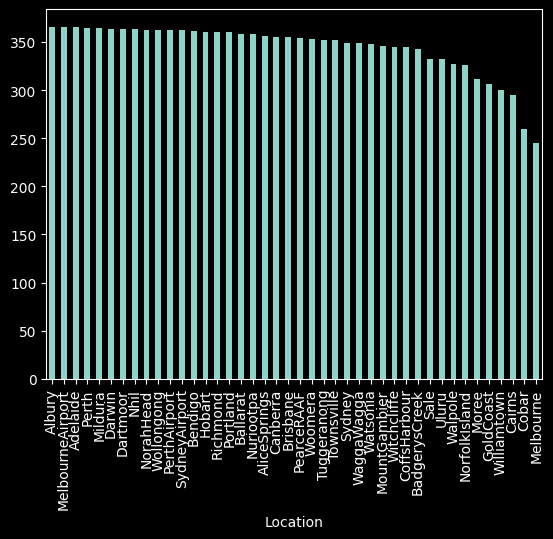

In [41]:
print(df['Location'].value_counts().plot(kind='bar'))

# 3
Rappresentare in un grafico la frequenza delle rilevazioni mensili per città. (punti 3)

In [42]:
crosstab = pd.crosstab(df['Month'], df['Location'])
print(crosstab)

Location  Adelaide  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  \
Month                                                                        
1               31      31            31             28        29       29   
2               29      29            29             29        27       27   
3               31      31            31             31        30       31   
4               30      30            29             30        30       30   
5               31      31            30             31        31       31   
6               30      30            30             30        29       30   
7               31      31            30             31        31       31   
8               31      31            31             31        31       31   
9               30      30            30             29        30       30   
10              31      31            30             31        30       31   
11              30      30            30             29        3

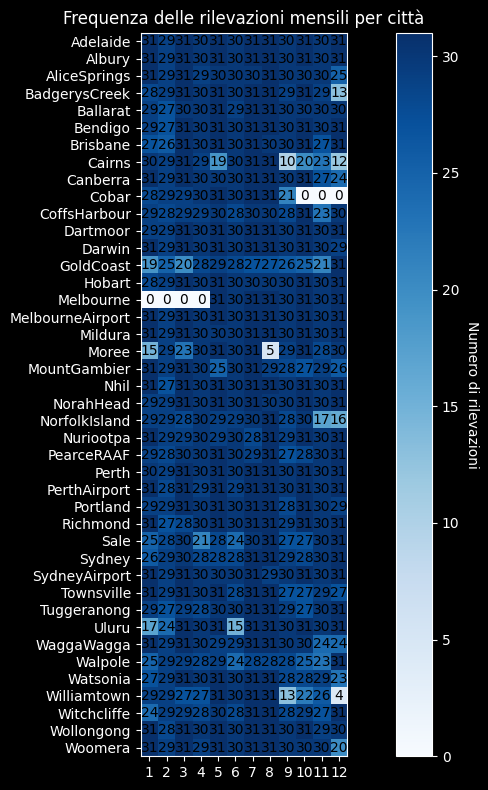

In [43]:
# GEMINI

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Crea la tabella di frequenza (Crosstab)
ct = pd.crosstab(df['Location'], df['Month'])

# 2. Imposta la figura
fig, ax = plt.subplots(figsize=(10, 8))

# 3. Crea la mappa di calore usando imshow
# 'cmap' definisce i colori (es. 'Blues', 'viridis', 'YlGnBu')
im = ax.imshow(ct, cmap='Blues')

# 4. Aggiungi la barra laterale dei colori (legenda)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Numero di rilevazioni", rotation=-90, va="bottom")

# 5. Imposta le etichette degli assi (Tick labels)
# Asse X: I mesi (colonne della crosstab)
ax.set_xticks(np.arange(len(ct.columns)))
ax.set_xticklabels(ct.columns)

# Asse Y: Le città (indice della crosstab)
ax.set_yticks(np.arange(len(ct.index)))
ax.set_yticklabels(ct.index)

# 6. (Opzionale) Aggiungi i numeri dentro ogni cella
# Questo ciclo inserisce il testo al centro di ogni quadrato
for i in range(len(ct.index)):
    for j in range(len(ct.columns)):
        text = ax.text(j, i, ct.iloc[i, j],
                       ha="center", va="center", color="black")

# Titoli e layout
ax.set_title("Frequenza delle rilevazioni mensili per città")
fig.tight_layout()
plt.show()


# 4
Calcolare per ogni città e per ogni mese l’umidità minima e la massima. (punti 2)

In [44]:
humidity_stats = df.groupby(['Location', 'Month'])
min_hum = humidity_stats[['Humidity9am', 'Humidity3pm']].min().min(axis=1)
max_hum = humidity_stats[['Humidity9am', 'Humidity3pm']].max().max(axis=1)
# 4. Crea un DataFrame finale pulito
humidity_unified = pd.DataFrame({
    'Minimo Assoluto': min_hum,
    'Massimo Assoluto': max_hum
})
humidity_unified

Minimo Assoluto  Massimo Assoluto
Location Month                                   
Adelaide 1                   11                93
         2                   13                76
         3                   19                93
         4                   15                84
         5                   32                93
...                         ...               ...
Woomera  8                   13                92
         9                   15                95
         10                   4                92
         11                   3                76
         12                   7                81

[497 rows x 2 columns]

# 5
 Creare un nuovo attributo “TemperatureRange” che mostri l’escursione termica giornaliera.
Rappresentare in un grafico l’escursione massima mensile. (punti 3)

<Axes: xlabel='Month'>

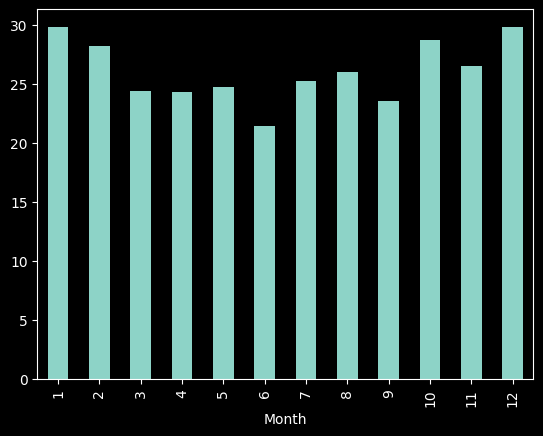

In [45]:
df['Temp_range'] = df['MaxTemp']-df['MinTemp']
df_monthmaxesc = df.groupby('Month')['Temp_range'].max()
df_monthmaxesc.plot(kind='bar')